In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import pandas as pd
from scipy.optimize import curve_fit

In [2]:
%%capture --no-display
df_0405 = pd.read_csv('boxC/boxC_0405_r-fixed.csv')['spectrum']
df_0607 = pd.read_csv('boxA/boxA_0607_refined.csv')['spectrum']
df_0809 = pd.read_csv('boxD/boxD_0809_fixed_2.csv')['spectrum']
df_1011 = pd.read_csv('boxA/boxA_1011.csv')['spectrum']
df_1213 = pd.read_csv('boxD/boxD_1213.csv')['spectrum']
df_1415 = pd.read_csv('boxE/boxE_1415.csv')['spectrum']
df_1617 = pd.read_csv('boxC/boxC_1617.csv')['spectrum']

vims_wave = np.loadtxt('vims_wave.txt')

for df in (df_0405,df_0607,df_0809,df_1011,df_1213,df_1415,df_1617):
    for i in range(len(df)):
        df[i] = np.array([float(x) for x in df[i][1:-1].split(',')])

In [3]:
def powerlaw(x,a,b):
    return a*np.power(x,b)

def gaussian(x,a,mu,sigma):
    return a*np.exp(-(x-mu)**2/(2*sigma**2))

band_channels = [29,30,31,32,33,34,46,47,48,49,50,51,52,53,54,55,56,57,58,59,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,102,103,104,105]

def fit_line(dataframe):
    spectra = np.average(dataframe)
    my_fit,_ = curve_fit(powerlaw,vims_wave[band_channels],spectra[band_channels],p0=[.15,-12])
    final_fit = powerlaw(vims_wave,*my_fit)
    return final_fit

def custom_fit(dataframe):
    spectra = np.average(dataframe)
    my_fit,_ = curve_fit(powerlaw,vims_wave[band_channels],spectra[band_channels],p0=[.15,-12])
    final_spectra = spectra-powerlaw(vims_wave,*my_fit)
    return final_spectra


In [4]:
spectra_0405 = custom_fit(df_0405)
spectra_0607 = custom_fit(df_0607)
spectra_0809 = custom_fit(df_0809)
spectra_1011 = custom_fit(df_1011)
spectra_1213 = custom_fit(df_1213)
spectra_1415 = custom_fit(df_1415)
spectra_1617 = custom_fit(df_1617)

spectra_list = [spectra_0405,spectra_0607,spectra_0809,spectra_1011,spectra_1213,spectra_1415,spectra_1617]

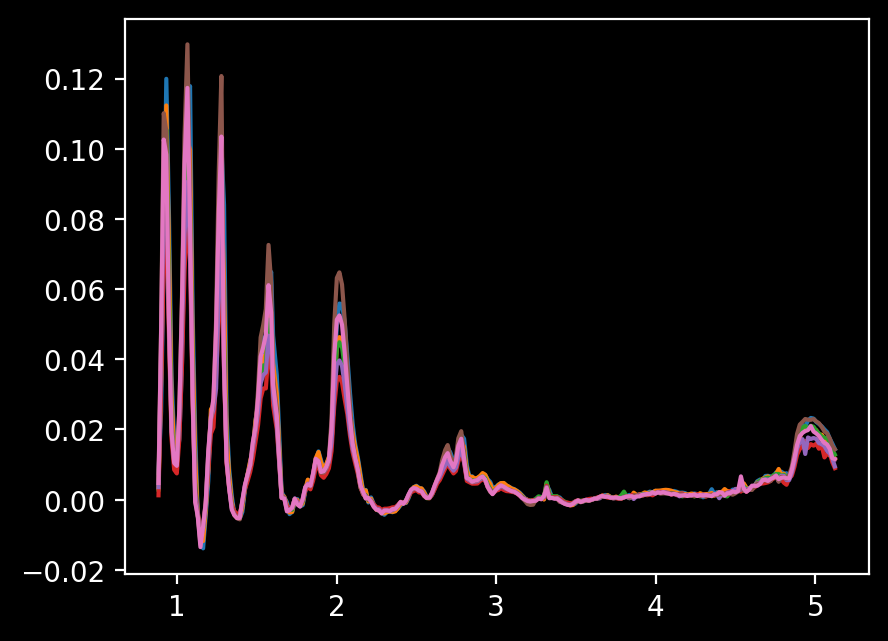

In [5]:
%matplotlib inline
x = vims_wave
for spectra in spectra_list:
    plt.plot(x,spectra)
plt.show()

### Why does the Gaussian output semi-work for all channels, but simply substituting it for the micron_window array 

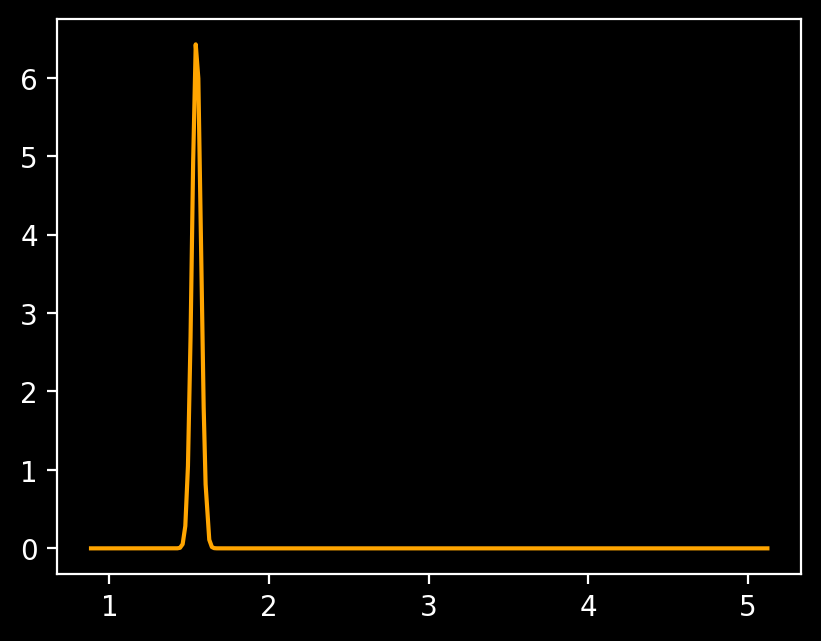

In [6]:
%matplotlib inline
x = vims_wave
y = spectra_0405
z = gaussian(x,x[56],x[81],np.std(x[56:81]))

my_fit,_ = curve_fit(gaussian,x[band_channels],y[band_channels],maxfev=2000)

plt.plot(x,gaussian(x,*my_fit),c='orange')
plt.show()

In [7]:
micron_window = list(range(56,81))

In [8]:
new_list = np.sort(band_channels+list(range(60,77)))

In [9]:
print(new_list)

[ 29  30  31  32  33  34  46  47  48  49  50  51  52  53  54  55  56  57
  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72  73  74  75
  76  78  79  80  81  82  83  84  85  86  87  88  89  90  91  92  93  94
  95 102 103 104 105]


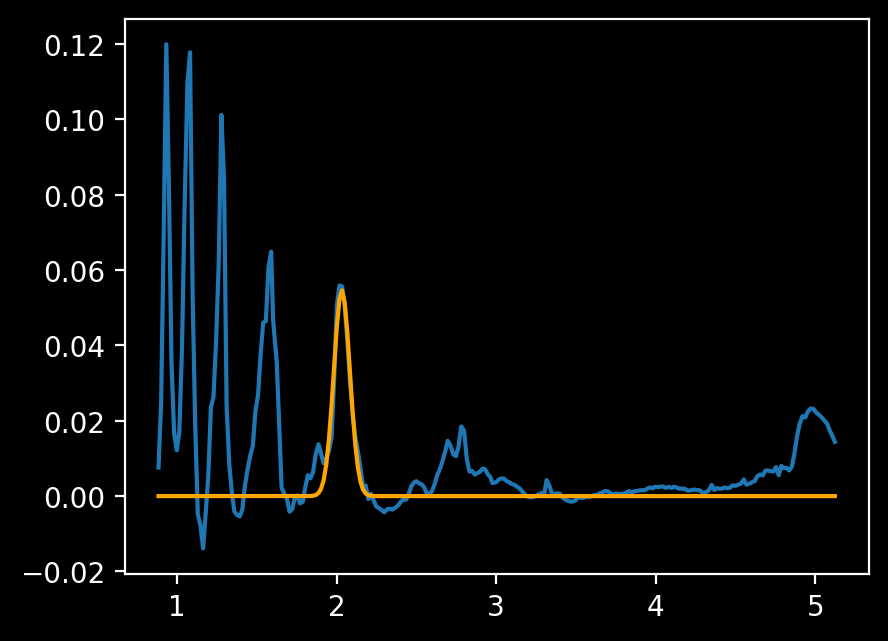

In [10]:
#Make the spectra part of the micron_window AND the band_channels list if possible?
%matplotlib inline
x = vims_wave
y = spectra_0405
z = gaussian(x,x[56],x[81],np.std(x[56:81]))

my_fit,_ = curve_fit(gaussian,x[new_list],y[new_list],maxfev=2000)

plt.plot(x,y)
plt.plot(x,gaussian(x,*my_fit),c='orange')
plt.show()

In [11]:
for object in (x[56],x[81],np.std(x[56:81]),x[band_channels],y[band_channels]):
    print(np.shape(object))

()
()
()
(42,)
(42,)
